In [1]:
from func.ultis import decompress_pickle, load_obj
import matplotlib.pyplot as plt

from func.run_pipeline_super_vox import reassign
import numpy as np
from func.plot_utils import colorful_seg, fill_noise

import napari

In [2]:
test_file = "Movie2_T00010_crop_gt.h5"

In [5]:
seg_final_eg_gcn = decompress_pickle(f"../../masterthesis_results/lrp_results/edge_gated_gcn/{test_file}_seg_final.pbz2")
seg_final_eg_gcn = fill_noise(seg_final_eg_gcn)
seg_final_eg_gcn_colorful = colorful_seg(seg_final_eg_gcn)

# seg_final_eg_gcn_list.append(seg_final_eg_gcn_colorful)

seg_final_retrained = decompress_pickle(f"../../masterthesis_results/lrp_results/retrained/{test_file}_seg_final.pbz2")
seg_final_retrained_colorful = colorful_seg(seg_final_retrained)

# seg_final_retrained_list.append(seg_final_retrained_colorful)

seg_final_gasp = decompress_pickle(f"../../masterthesis_results/lrp_results/gasp/{test_file}_seg_final.pbz2")
seg_final_gasp_colorful = colorful_seg(seg_final_gasp.astype(np.int32))

# seg_final_gasp_list.append(seg_final_gasp_colorful)

9722863741339490.404157043879907640.41108545034642030.4180138568129330.424942263279445730.431870669745958450.43879907621247110.44572748267898380.452655889145496540.459584295612009250.46651270207852190.473441108545034630.480369515011547340.487297921478060060.49422632794457280.50115473441108550.50808314087759820.51501154734411080.52193995381062350.52886836027713620.5357967667436490.54272517321016170.54965357967667440.55658198614318710.56351039260969980.57043879907621240.57736720554272510.58429561200923790.59122401847575060.59815242494226330.6050808314087760.61200923787528870.61893764434180140.6258660508083140.63279445727482670.63972286374133950.64665127020785220.65357967667436490.66050808314087760.66743648960739030.6743648960739030.68129330254041580.68822170900692840.69515011547344110.70207852193995380.70900692840646650.71593533487297920.72286374133949190.72979214780600470.73672055427251740.743648960739030.75057736720554270.75750577367205540.76443418013856810.77136258660508080.7782909930

In [6]:
import h5py

hf = h5py.File(f"../data/CellSeg_dataset/LateralRootPrimordia_processed_wide_boundary_non_precropped/test/{test_file}", 'r')
print(hf.keys())
raw_img = np.array(hf["raw"], dtype=np.float)
hand_seg = np.array(hf["ins"], dtype=np.float)

<KeysViewHDF5 ['background', 'boundary', 'edge_background', 'edge_boundary', 'edge_foreground', 'foreground', 'ins', 'raw']>


/var/folders/qq/9q6wphrj19z8xt4qcffm8df80000gn/T/ipykernel_71522/2043115496.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  raw_img = np.array(hf["raw"], dtype=np.float)
/var/folders/qq/9q6wphrj19z8xt4qcffm8df80000gn/T/ipykernel_71522/2043115496.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hand_seg = np.array(hf["ins"], dtype=n

In [7]:
hand_seg = colorful_seg(hand_seg)


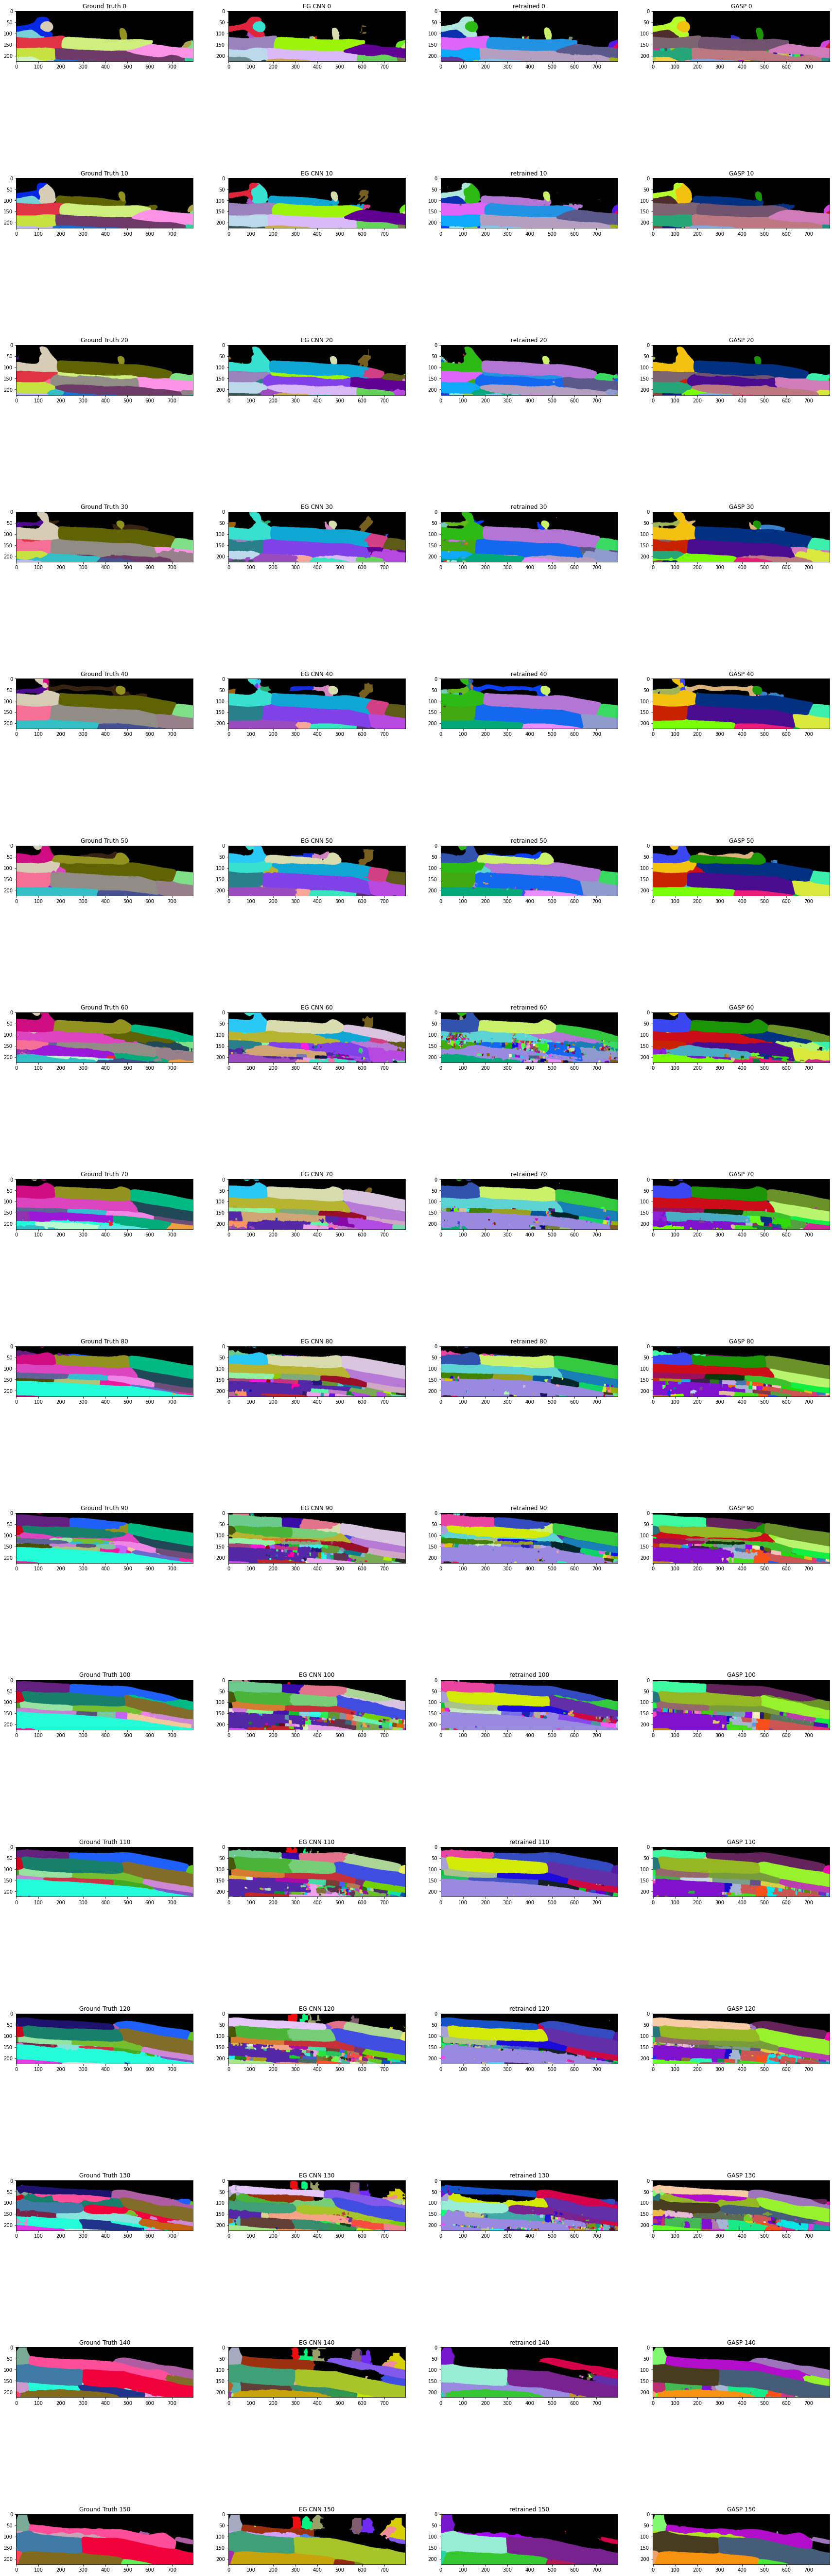

In [11]:
fig, axes = plt.subplots(16, 4, figsize=(30, 100))
for index, a in enumerate(axes):
    shown_index = index * 10

    a[0].imshow(hand_seg[shown_index, ...])
    a[1].imshow(seg_final_eg_gcn_colorful[shown_index, ...])
    a[2].imshow(seg_final_retrained_colorful[shown_index, ...])
    a[3].imshow(seg_final_gasp_colorful[shown_index, ...])

    a[0].set_title(f'Ground Truth {shown_index}')
    a[1].set_title(f'EG CNN {shown_index}')
    a[2].set_title(f'retrained {shown_index}')
    a[3].set_title(f'GASP {shown_index}')

In [ ]:
# 110 scheint gut...

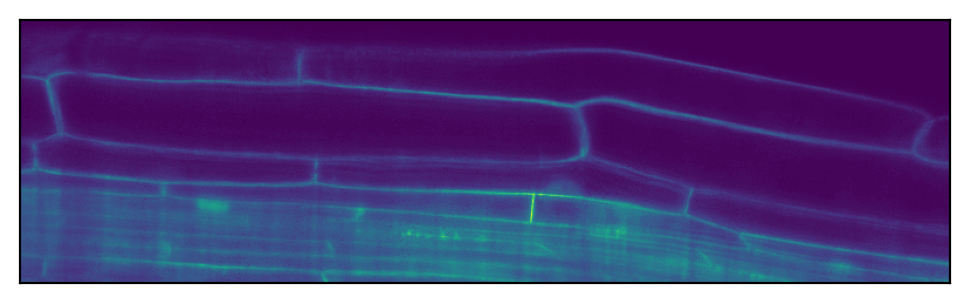

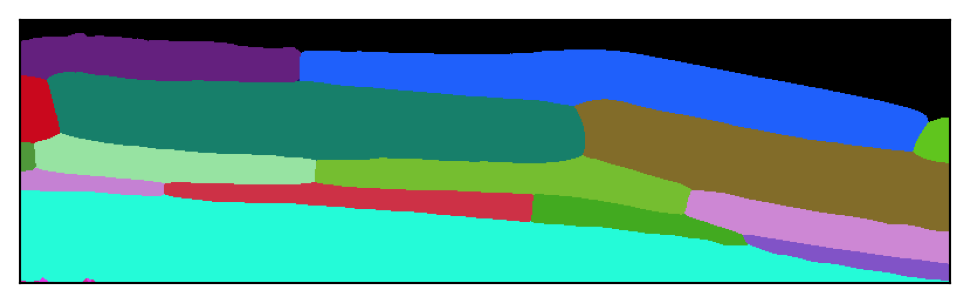

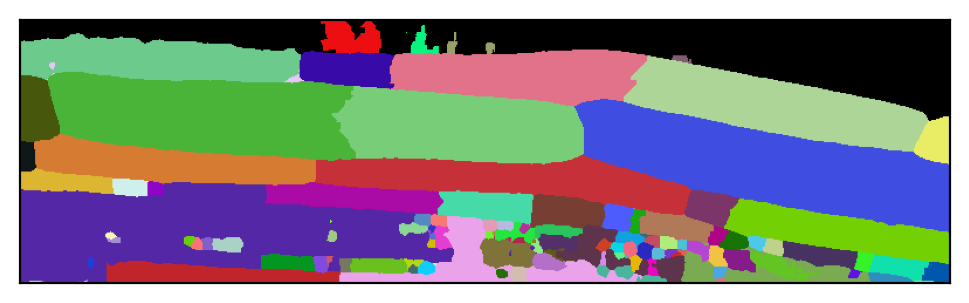

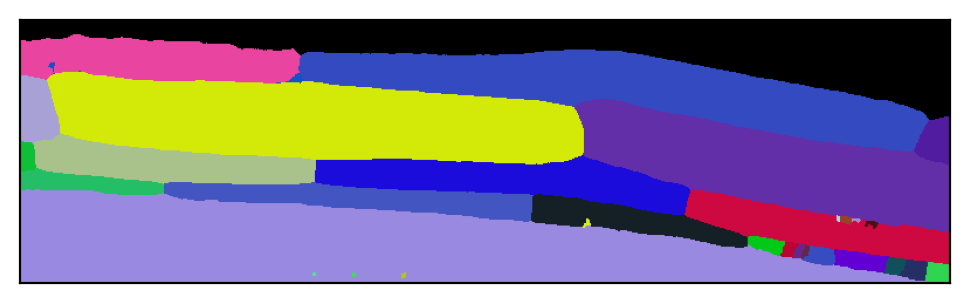

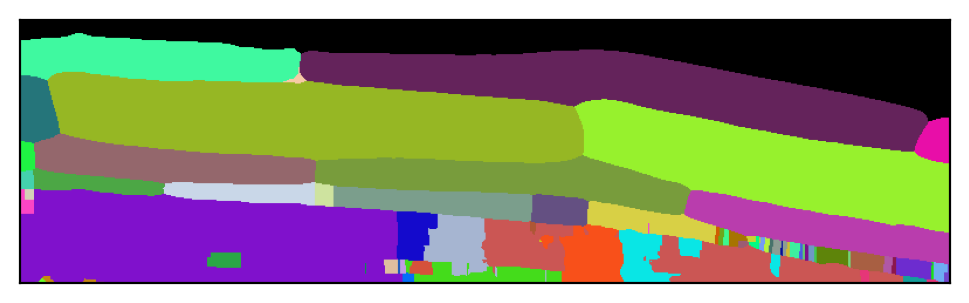

In [13]:
N=110

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(raw_img[N, :, :])
plt.savefig("outputs/raw_img_lrp_2.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(hand_seg[N, :, :])
plt.savefig("outputs/handseg_lrp_2.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(seg_final_eg_gcn_colorful[N, :, :])
plt.savefig("outputs/final_seg_eg_gcn_lrp_2.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(seg_final_retrained_colorful[N, :, :])
plt.savefig("outputs/final_retrained_lrp_2.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(seg_final_gasp_colorful[N, :, :])
plt.savefig("outputs/final_seg_gasp_lrp_2.pdf", bbox_inches='tight')